# Introduction

## Import Statements

In [65]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
# from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format


## Load the Data

In [66]:
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [67]:
print(f"shape of fatalities: {df_fatalities.shape}")


shape of fatalities: (2535, 14)


In [68]:
print(f"Column names of fatalities: {df_fatalities.columns.tolist()}")

Column names of fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [70]:
df_fatalities.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2531,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2532,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [72]:
df_fatalities.duplicated().any()

False

In [77]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [78]:
df_fatalities.dropna(inplace=True)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

In [79]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [80]:
victims_by_race = df_fatalities['race'].value_counts().rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'})
victims_by_race

White              1168
Black               592
Hispanic            401
Asian                36
Native American      29
Others               28
Name: race, dtype: int64

In [81]:
px.pie(
    names = victims_by_race.index,
    values = victims_by_race,
    title = 'Victims by Race',
    hole = 0.4
)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [82]:
victims_by_sex = df_fatalities['gender'].value_counts().rename({'M':'Male','F':'Female'})
victims_by_sex

Male      2160
Female      94
Name: gender, dtype: int64

In [44]:
px.pie(
    values = victims_by_sex,
    names = victims_by_sex.index,
    title = 'Victims by Sex'
)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [83]:
px.box(
    df_fatalities[df_fatalities['gender']=='M'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Male)'
)

In [84]:
px.box(
    df_fatalities[df_fatalities['gender']=='F'],
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Female)'
)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [85]:
armed_status = df_fatalities['armed'].value_counts()
armed_status

gun            1247
knife           324
unarmed         165
vehicle         158
toy weapon      102
               ... 
chain saw         1
garden tool       1
pole              1
pick-axe          1
pen               1
Name: armed, Length: 67, dtype: int64

<AxesSubplot:title={'center':'Top 10 Victims armed status'}>

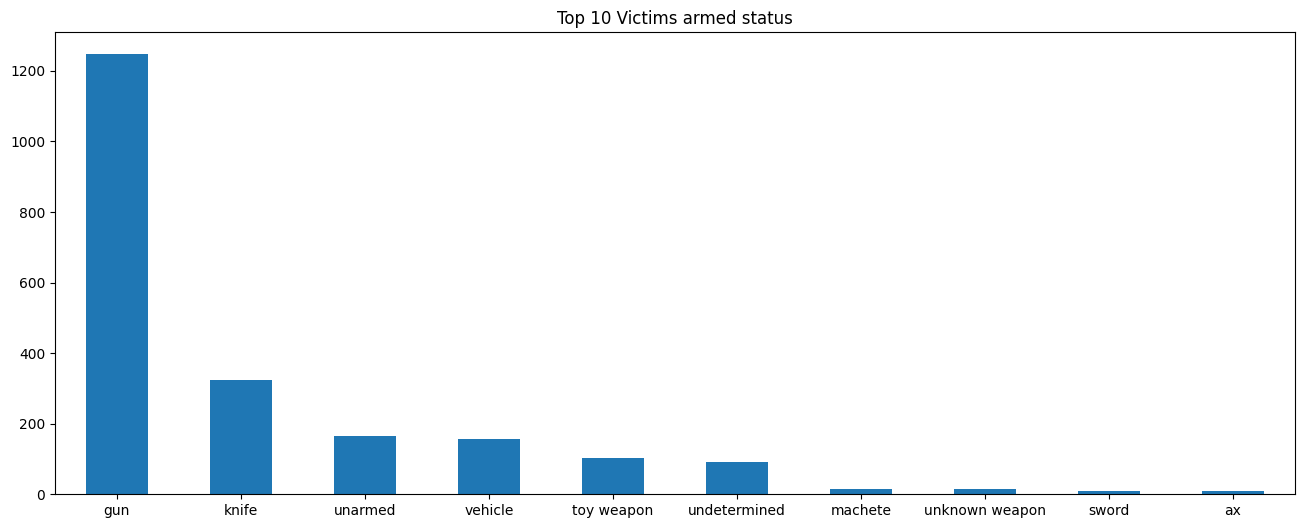

In [86]:
armed_status[:10].plot(
    kind='bar',
    figsize = (16,6),
    title = 'Top 10 Victims armed status',
    rot=0,
)

In [87]:
armed_vs_unarmed = pd.Series({
    'armed':len(df_fatalities[df_fatalities['armed']!='unarmed']),
    'unarmed':len(df_fatalities[df_fatalities['armed']=='unarmed'])
})
armed_vs_unarmed

armed      2089
unarmed     165
dtype: int64

In [88]:
px.pie(
    names = armed_vs_unarmed.index,
    values = armed_vs_unarmed.values,
    title = 'Armed vs Unarmed Percentage'
)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [89]:
under_25 = len(df_fatalities[df_fatalities['age']<25])/len(df_fatalities)*100
print(f'{under_25:.2f}% of police killing victims are under the age of 25')

18.72% of police killing victims are under the age of 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

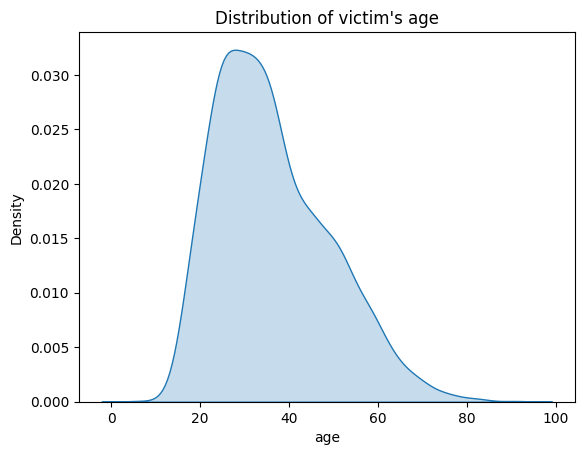

In [90]:
plt.title("Distribution of victim's age")
sns.kdeplot(data=df_fatalities, x='age', fill=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

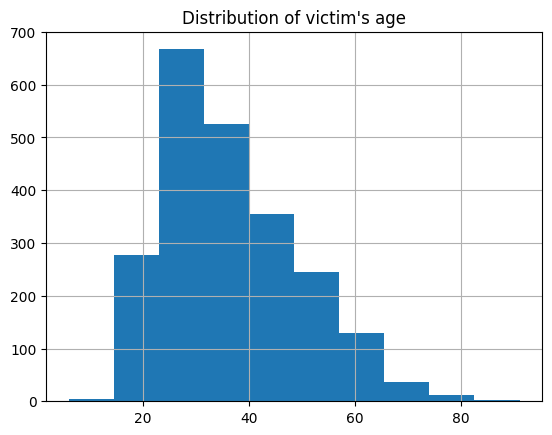

In [91]:
plt.title("Distribution of victim's age")
df_fatalities['age'].hist()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

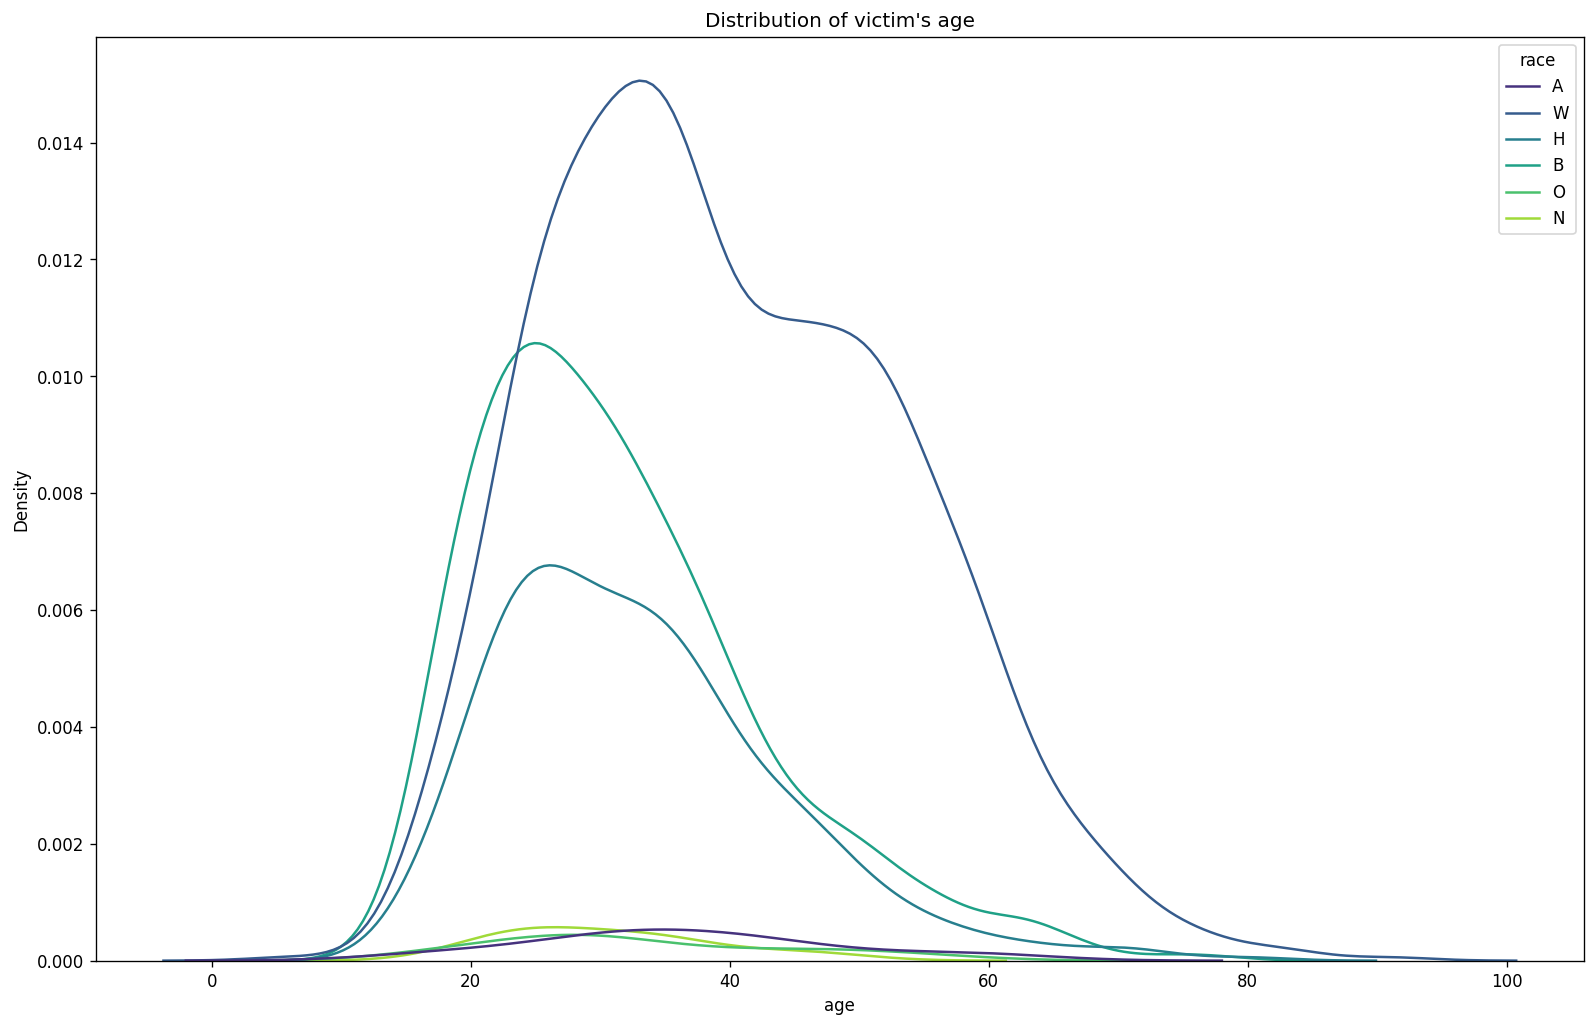

In [92]:
plt.figure(figsize=(16,10), dpi=120)
plt.title("Distribution of victim's age")
sns.kdeplot(
    data=df_fatalities.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'}),
    x='age',
    hue='race',
    palette='viridis'
)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [93]:
fatalities_by_mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()

In [94]:
px.pie(
    title = 'Relationship between Police Killing Victims and Mental Illness',
    names = fatalities_by_mental_illness.index,
    values = fatalities_by_mental_illness.values,
)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [95]:
top_10_cities = df_fatalities['city'].value_counts().sort_values(ascending=False)[:10]
top_10_cities

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
San Antonio     15
Miami           15
Indianapolis    14
Name: city, dtype: int64

<AxesSubplot:title={'center':'Top 10 Cities with the most police killings'}>

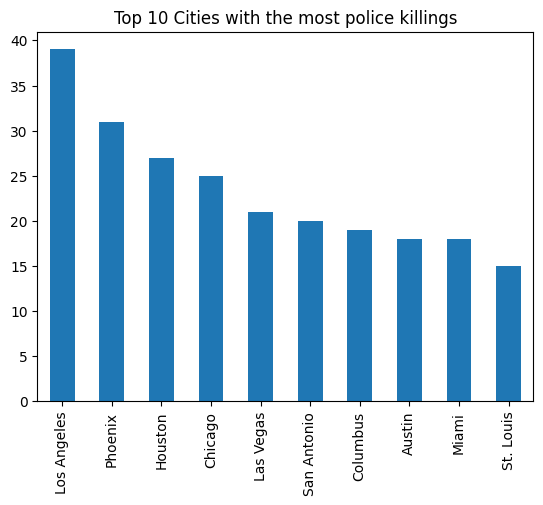

In [57]:
plt.title('Top 10 Cities with the most police killings')
top_10_cities.plot(kind='bar')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [96]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10_cities.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.fillna(0, inplace=True)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)
top_10_cities_by_race

race,Asian,Black,Hispanic,Native American,Others,White
city,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,0.00,19.00,1.00,0.00,0.00,2.00
Columbus,0.00,9.00,0.00,0.00,1.00,6.00
Houston,1.00,14.00,5.00,1.00,0.00,3.00
Indianapolis,0.00,9.00,0.00,0.00,0.00,5.00
Las Vegas,0.00,3.00,5.00,0.00,0.00,9.00
Los Angeles,1.00,10.00,18.00,0.00,0.00,6.00
Miami,0.00,7.00,6.00,0.00,0.00,2.00
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00


<AxesSubplot:title={'center':'Rate of Death by Race on Top 10 Cities'}, xlabel='city'>

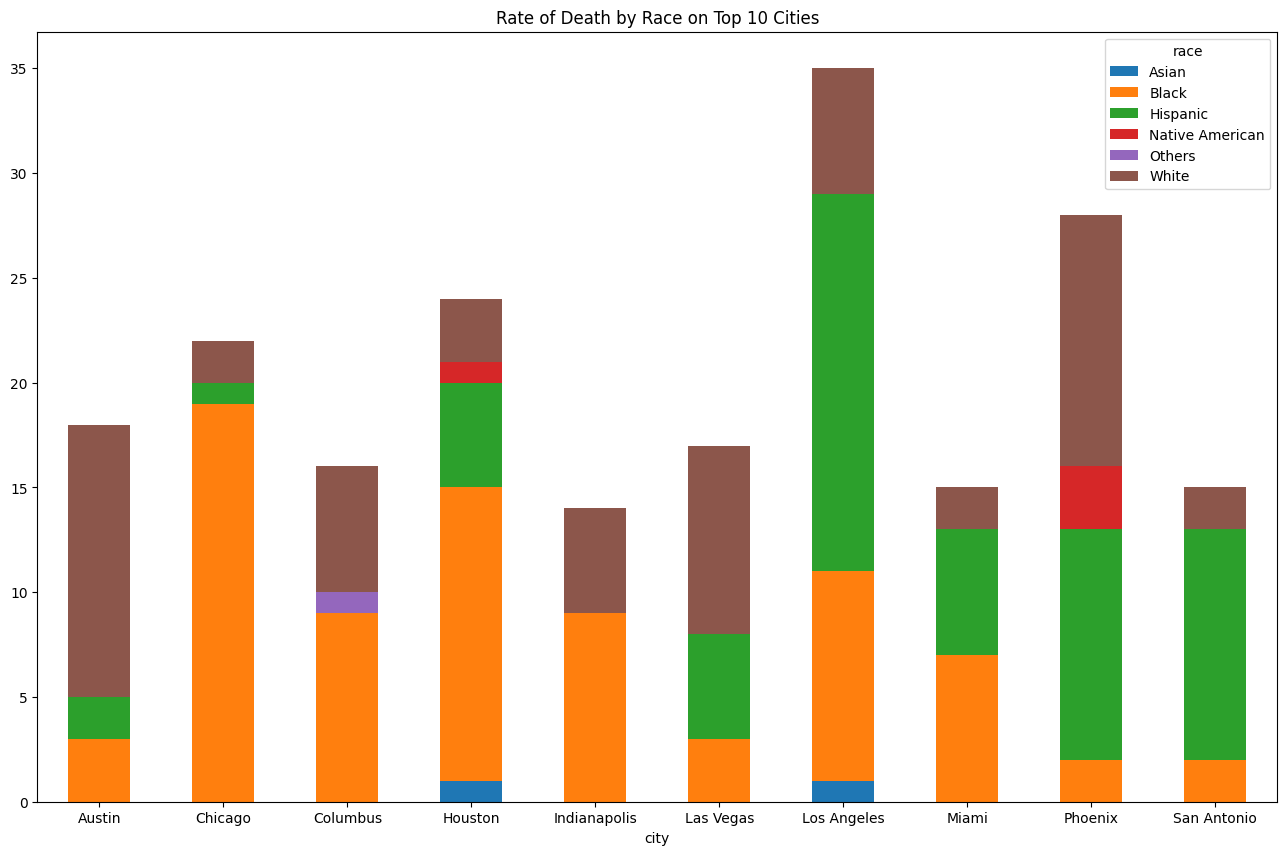

In [97]:
top_10_cities_by_race.plot(
    kind='bar',
    stacked=True,
    figsize=(16,10),
    title='Rate of Death by Race on Top 10 Cities',
    rot=0
)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [98]:
death_by_state = df_fatalities['state'].value_counts().sort_index()

In [99]:
px.choropleth(
    data_frame = death_by_state,
    locations = death_by_state.index,
    color = death_by_state.values,
    locationmode="USA-states",
    scope='usa',
    title = 'Police Killings b'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [100]:
fatality_by_date = df_fatalities['date'].value_counts().sort_index()
fatality_by_date

2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    1
             ..
2017-12-02    2
2017-12-03    2
2017-12-04    1
2017-12-05    3
2017-12-06    4
Name: date, Length: 846, dtype: int64

<AxesSubplot:title={'center':'Number of Police Killings over time'}>

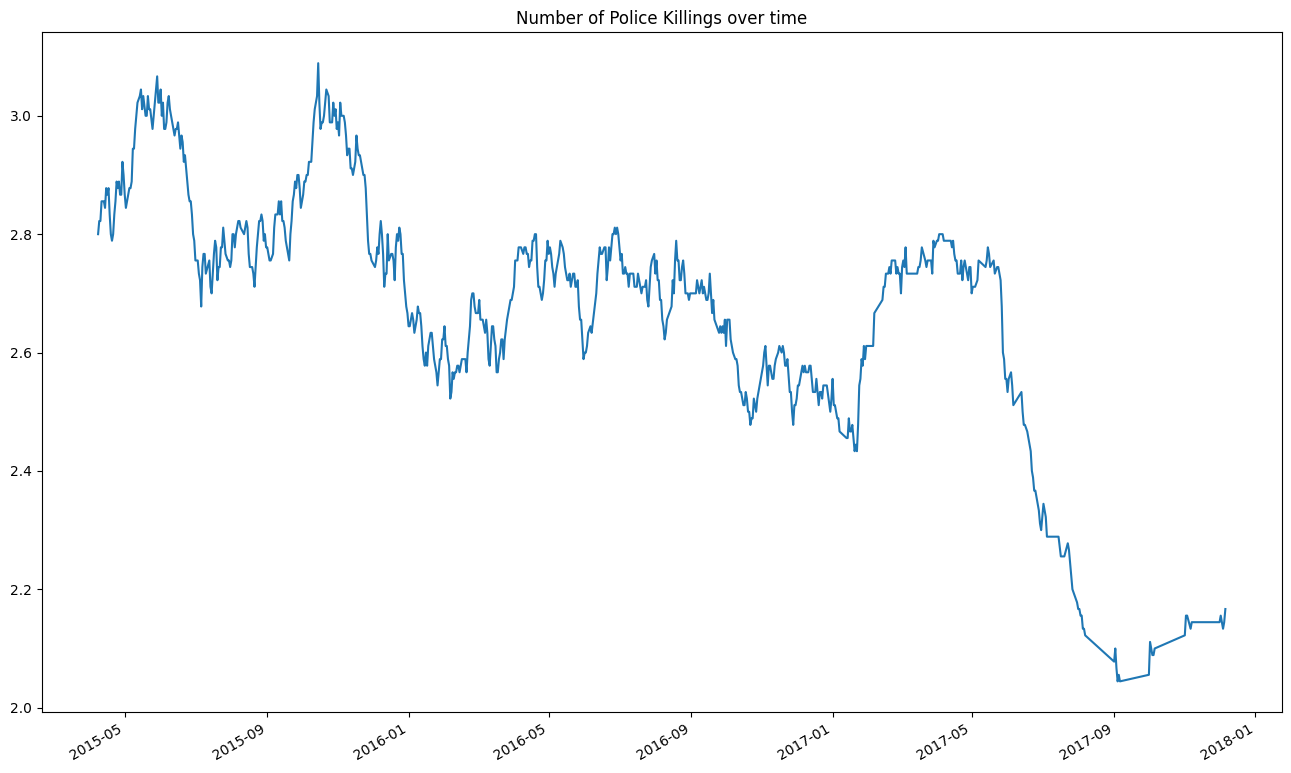

In [101]:
fatality_by_date.rolling(90).mean().plot(
    title='Number of Police Killings over time',
    figsize = (16,10)
)

In time police killing seems to have decreased